In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import time


In [25]:
# Parameters
num_samples = 10000

# Generate uniform random numbers
u1 = np.random.uniform(0, 1, num_samples)
u2 = np.random.uniform(0, 1, num_samples)

# Inverse transform method
start_time = time.time()
x_inverse_transform = norm.ppf(u1)
end_time = time.time()
inverse_transform_time = end_time - start_time

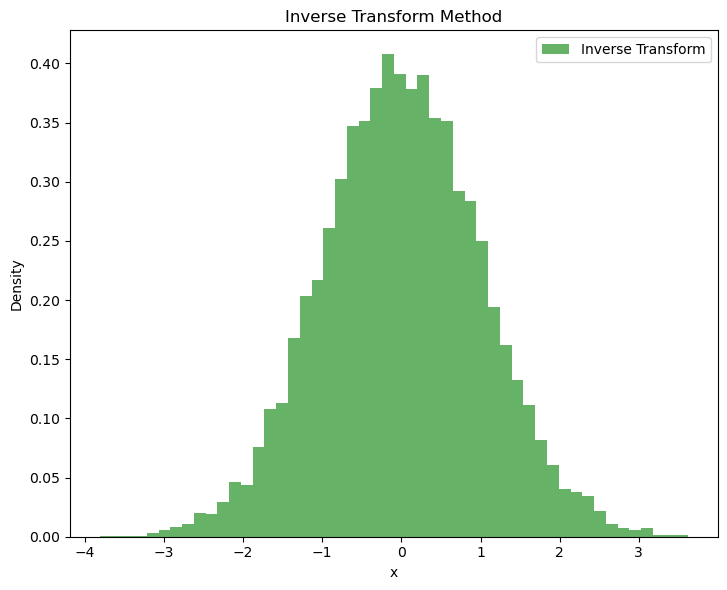

In [26]:
#Step 4: Plot the results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(x_inverse_transform, bins=50, density=True, alpha=0.6, color='g', label='Inverse Transform')
plt.title('Inverse Transform Method')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


In [27]:
# Output the time taken
print(f"Inverse Transform Method Time: {inverse_transform_time:.4f} seconds")

Inverse Transform Method Time: 0.0029 seconds


In [28]:
# Variance and Convergence for Inverse Transform Method
mean_inverse_transform = np.mean(x_inverse_transform)
variance_inverse_transform = np.var(x_inverse_transform)
print(f"Inverse Transform Method Mean: {mean_inverse_transform:.4f}, Variance: {variance_inverse_transform:.4f}")

Inverse Transform Method Mean: 0.0058, Variance: 1.0037


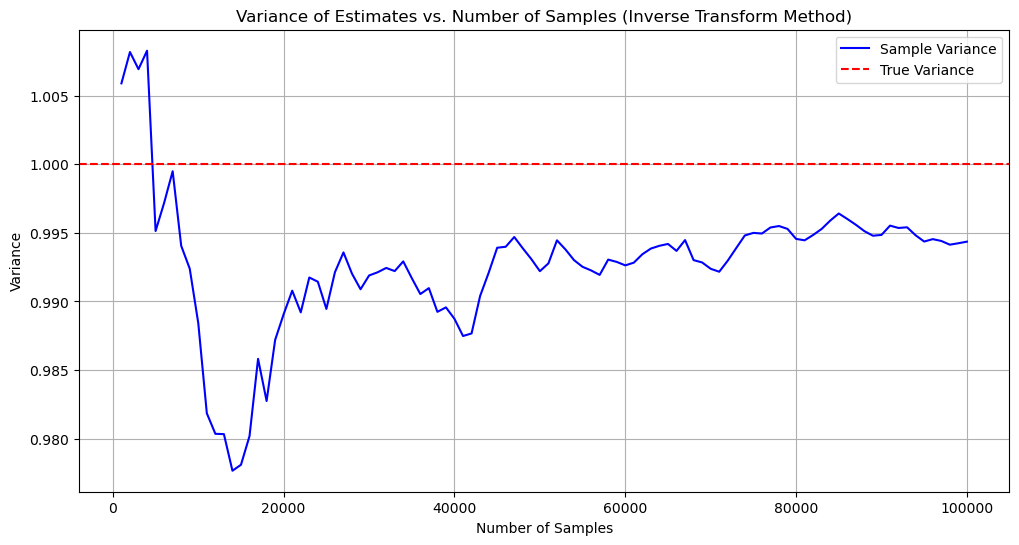

In [29]:
# Parameters
max_samples = 100000
step_size = 1000

# Generate uniform random numbers
u = np.random.uniform(0, 1, max_samples)

# Inverse transform method
samples = norm.ppf(u)

# True mean and variance for standard normal distribution
true_mean = 0
true_variance = 1

# Initialize lists to store results
sample_sizes = list(range(step_size, max_samples + 1, step_size))
means = []
variances = []

# Calculate means and variances for increasing sample sizes
for size in sample_sizes:
    current_samples = samples[:size]
    means.append(np.mean(current_samples))
    variances.append(np.var(current_samples))

# Plot the variance of the estimates against the number of samples
plt.figure(figsize=(12, 6))
plt.plot(sample_sizes, variances, label='Sample Variance', color='blue')
plt.axhline(y=true_variance, color='red', linestyle='--', label='True Variance')
plt.title('Variance of Estimates vs. Number of Samples (Inverse Transform Method)')
plt.xlabel('Number of Samples')
plt.ylabel('Variance')
plt.legend()
plt.grid(True)
plt.show()


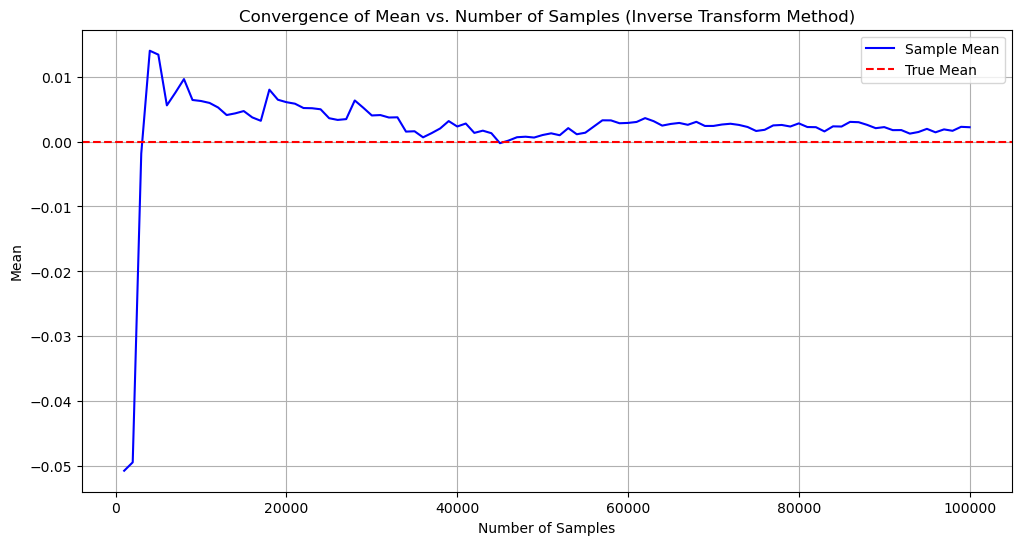

In [30]:
# Plot the convergence of the mean to the true mean
plt.figure(figsize=(12, 6))
plt.plot(sample_sizes, means, label='Sample Mean', color='blue')
plt.axhline(y=true_mean, color='red', linestyle='--', label='True Mean')
plt.title('Convergence of Mean vs. Number of Samples (Inverse Transform Method)')
plt.xlabel('Number of Samples')
plt.ylabel('Mean')
plt.legend()
plt.grid(True)
plt.show()


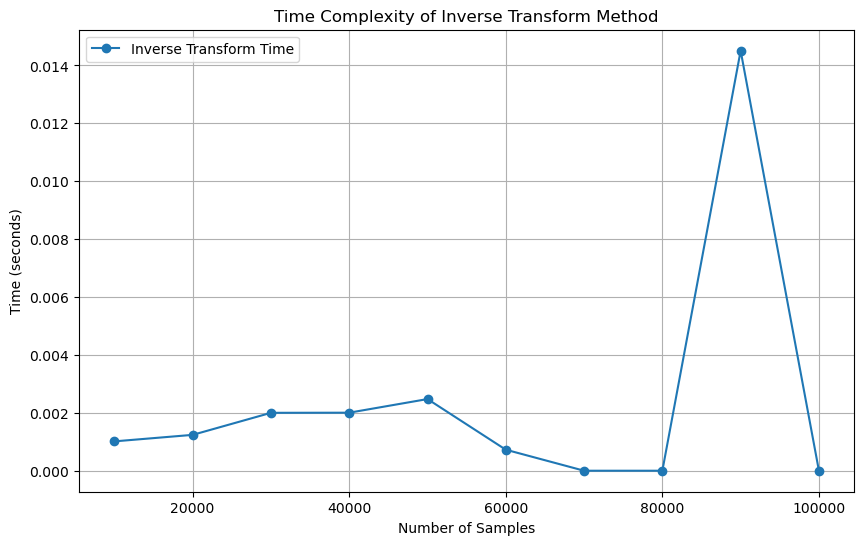

In [31]:
# Parameters
max_samples = 100000
step_size = 10000

# Function to measure time for generating samples
def measure_time_inverse_transform(num_samples):
    u = np.random.uniform(0, 1, num_samples)
    start_time = time.time()
    samples = norm.ppf(u)
    end_time = time.time()
    return end_time - start_time

# Measure time for different sample sizes
sample_sizes = range(step_size, max_samples + 1, step_size)
times = [measure_time_inverse_transform(size) for size in sample_sizes]

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, times, label='Inverse Transform Time', marker='o')
plt.title('Time Complexity of Inverse Transform Method')
plt.xlabel('Number of Samples')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()


In [32]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Parameters
max_samples = 100000
step_size = 1000

# Generate uniform random numbers
u = np.random.uniform(0, 1, max_samples)

# Inverse transform method
samples = norm.ppf(u)

# True mean and variance for standard normal distribution
true_mean = 0
true_variance = 1

# Initialize lists to store results
sample_sizes = list(range(step_size, max_samples + 1, step_size))
means = []
variances = []

# Calculate means and variances for increasing sample sizes
for size in sample_sizes:
    current_samples = samples[:size]
    means.append(np.mean(current_samples))
    variances.append(np.var(current_samples))

# Create subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    subplot_titles=('Variance of Estimates vs. Number of Samples',
                                    'Convergence of Mean vs. Number of Samples'))

# Add variance plot
fig.add_trace(go.Scatter(x=sample_sizes, y=variances, mode='lines+markers',
                         name='Sample Variance', line=dict(color='blue')),
              row=1, col=1)
fig.add_hline(y=true_variance, line=dict(color='red', dash='dash'),
              annotation_text='True Variance', row=1, col=1)

# Add mean convergence plot
fig.add_trace(go.Scatter(x=sample_sizes, y=means, mode='lines+markers',
                         name='Sample Mean', line=dict(color='blue')),
              row=2, col=1)
fig.add_hline(y=true_mean, line=dict(color='red', dash='dash'),
              annotation_text='True Mean', row=2, col=1)

# Update layout
fig.update_layout(height=800, width=1000, title_text='Inverse Transform Method Efficiency',
                  xaxis_title='Number of Samples', yaxis_title='Value',
                  template='plotly_white')

# Show plot
fig.show()
